# Emotionflow Metaflow stats

Analysis of metaflow saved state data.
Run the metaflow once so you may access the saved data here:

```
python emotionflow.py --environment=conda run
python emotionflow.py --environment=conda show # shows steps that would be executed
python emotionflow.py --environment=conda resume # resume just before failed step
python emotionflow.py --environment=conda resume stepname # resume from stepname
```

In [5]:
from metaflow import Flow, get_metadata

In [6]:
print("Using metadata provider: %s" % get_metadata())

Using metadata provider: local@/home/lukas/git/dajare/emotion


In [7]:
run = Flow("EmotionFlow").latest_successful_run
print("Using analysis from '%s'" % str(run))

Using analysis from 'Run('EmotionFlow/1582192689081816')'


In [12]:
run.created_at

'2020-02-20T09:58:09.%fZ'

In [13]:
load_data = run['load'].task.data
ecorp = load_data.ecorp
available_emotions = run['load'].task.data.available_emotions
print(ecorp)
print(available_emotions)

       Word Katakana Emotion
0         哀       アイ       悲
1         愛       アイ       好
2     相いれない   アイイレナイ       嫌
3        哀感     アイカン       悲
4        愛敬    アイキョウ      好親
...     ...      ...     ...
1973    悪賢い   ワルガシコイ       嫌
1974   悪びれる    ワルビレル       謝
1975  我を忘れる  ワレオワスレル       興
1976     わぁ       ワー       喜
1977    わーい      ワーイ       喜

[1978 rows x 3 columns]
        Emotion Symbol
0           安らぎ      安
1           楽しさ      楽
2           親しみ      親
3         尊敬・尊さ      尊
4            感謝      感
5        気持ちが良い      気
6          誇らしい      誇
7            感動      動
8            喜び      喜
9           悲しさ      悲
10          寂しさ      寂
11           不満      不
12          切なさ      切
13          苦しさ      苦
14           不安      ふ
15           憂鬱      鬱
16           辛さ      辛
17           好き      好
18           嫌悪      嫌
19        恥ずかしい      恥
20           焦り      焦
21           驚き      驚
22           怒り      怒
23          幸福感      幸
24           恨み      恨
25  恐れ（恐縮等の意味で）      恐
26    

Check what emotions are available, multiple emotions per sentence!

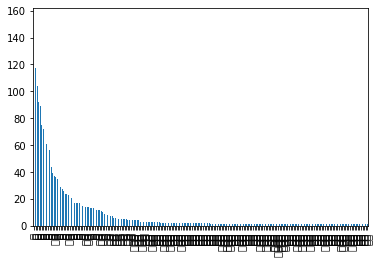

In [18]:
ecorp.Emotion.value_counts().plot.bar()

## Test corpus and analysis

In [14]:
prepare_lookup_data = run['prepare_lookup'].task.data
#lookup building
print(prepare_lookup_data.elookup_raw['飽き足りる'])
print(prepare_lookup_data.elookup['飽き足り'])

['不満']
{'不満'}


### Load Emotionpredictor and predict some sentences

In [15]:
import pickle

import Mykytea
opt = "-model /usr/local/share/kytea/model.bin"
mk = Mykytea.Mykytea(opt)

In [16]:
sentences = ['あなた毛布取らないで', 'あなたもう太らないで', '友達が寂しい',
            'おお味噌か?','ひと月居てもいい？','隣には誰もいなくて彼も寂しい','カナリヤ少ない','バナナを食べましたが美味しかった',
            '文句を言ったら怒られた']

### Predict using pickled model

In [17]:
predictor = pickle.load(open("emotionpredictor.pkl", "rb"))
[(sentence, predictor.emotions(sentence, mk)) 
 for sentence in sentences]

[('あなた毛布取らないで', {'あきれ', '困惑'}),
 ('あなたもう太らないで', set()),
 ('友達が寂しい', {'寂しさ'}),
 ('おお味噌か?', {'驚き'}),
 ('ひと月居てもいい？', set()),
 ('隣には誰もいなくて彼も寂しい', {'寂しさ'}),
 ('カナリヤ少ない', set()),
 ('バナナを食べましたが美味しかった', {'喜び', '安らぎ', '穏やか'}),
 ('文句を言ったら怒られた', {'不満', '怒り'})]

### Predict using persisted model on flow from Amazon S3
which has actually also been pickled

In [18]:
predictor = run['deliver_model'].task.data.predictor
[(sentence, predictor.emotions(sentence, mk)) 
 for sentence in sentences]

[('あなた毛布取らないで', {'あきれ', '困惑'}),
 ('あなたもう太らないで', set()),
 ('友達が寂しい', {'寂しさ'}),
 ('おお味噌か?', {'驚き'}),
 ('ひと月居てもいい？', set()),
 ('隣には誰もいなくて彼も寂しい', {'寂しさ'}),
 ('カナリヤ少ない', set()),
 ('バナナを食べましたが美味しかった', {'喜び', '安らぎ', '穏やか'}),
 ('文句を言ったら怒られた', {'不満', '怒り'})]